In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcard.csv


In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report,f1_score,recall_score,roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal","Fraud"]

In [9]:
#Loading credit card data into Pandas dataframe
ccdf = pd.read_csv('/kaggle/input/creditcard.csv')

In [10]:
#First 5 rows of the dataset
ccdf.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
#Last 5 rows of the dataset
ccdf.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [12]:
#Dataset Information
ccdf.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [13]:
#Dataset Description
ccdf.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [14]:
#Number of missing values in each column
ccdf.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

It seems we don't have any values missing from our dataset.

In [15]:
#Distribution of fraudulent & non-fraudulent transactions
ccdf['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

This is a highly unbalanced dataset.
Class 0 refers to non-fraudulent transactions.
Class 1 refers to fraudulent transactions.

In [16]:
class_count = pd.value_counts(ccdf['Class'], sort = True)

Text(0, 0.5, 'Frequency')

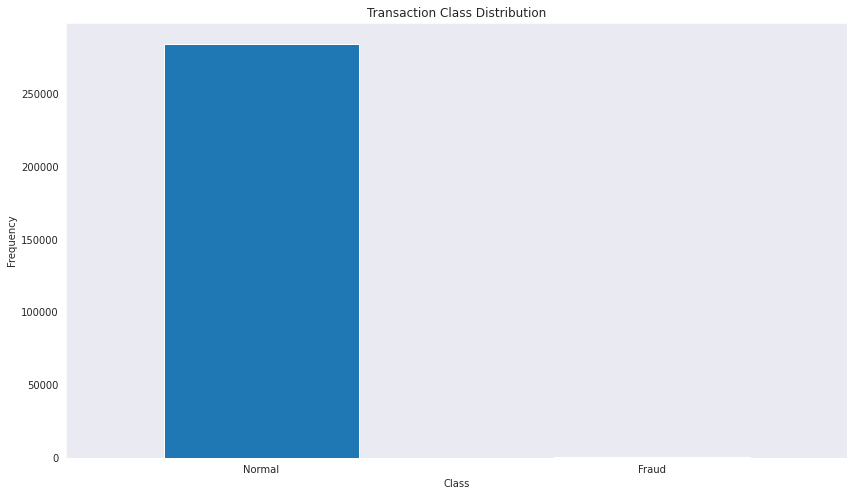

In [17]:
class_count.plot(kind = 'bar', rot = 0)
plt.title('Transaction Class Distribution')
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [18]:
#Separation of legit and fraud data for analysis
non_fraud = ccdf[ccdf.Class == 0]
fraud = ccdf[ccdf.Class == 1]
print(non_fraud.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [19]:
print(non_fraud.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [20]:
#Statistical Metrics of the non fraudulent class data
non_fraud.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [21]:
#Statistical Metrics of the fraudulent class data
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

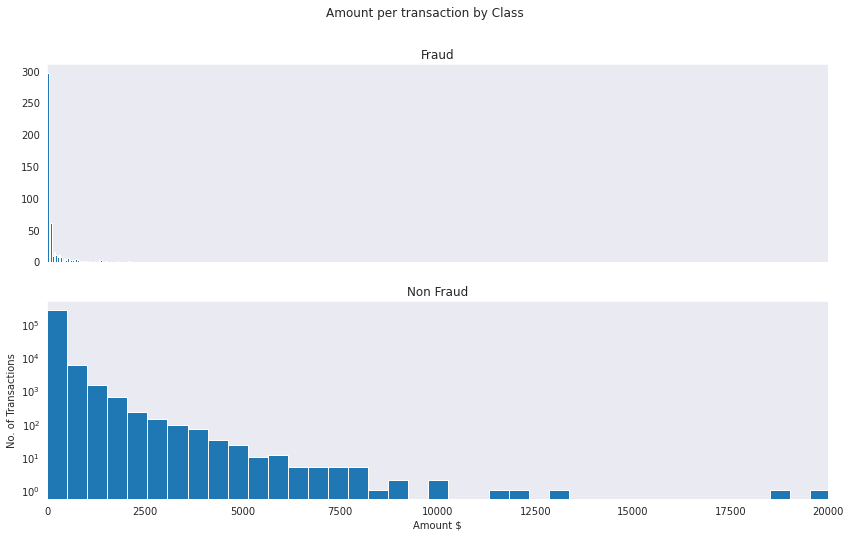

In [22]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle("Amount per transaction by Class")
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title("Fraud")
ax2.hist(non_fraud.Amount, bins = bins)
ax2.set_title("Non Fraud")
plt.xlabel('Amount $')
plt.ylabel('No. of Transactions')
plt.xlim((0,20000))
plt.yscale('log')
plt.show();

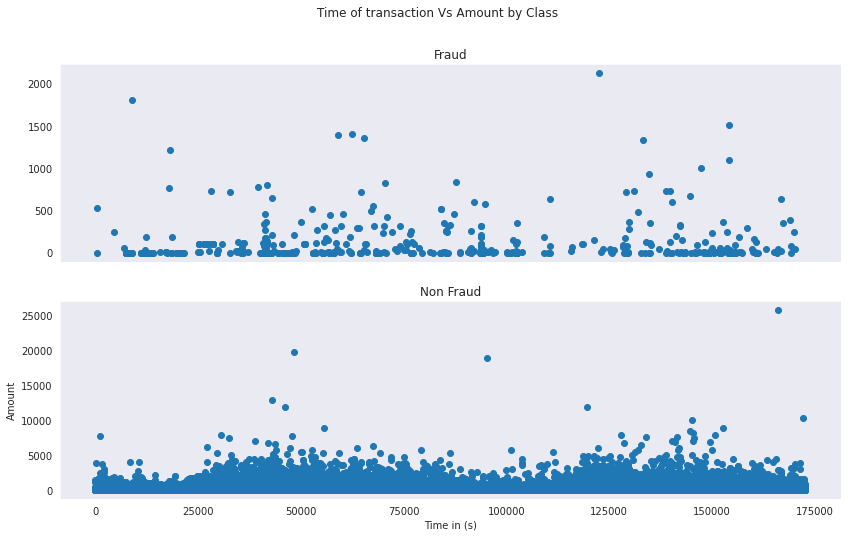

In [23]:
#Do fraudulent transactions occur more often during certain time fram ? Visual representation is performed below
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle("Time of transaction Vs Amount by Class")
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title("Fraud")
ax2.scatter(non_fraud.Time, non_fraud.Amount)
ax2.set_title("Non Fraud")
plt.xlabel('Time in (s)')
plt.ylabel('Amount')
plt.show();

In [24]:
#Take some sample of the data
data_1 = ccdf.sample(frac = 0.1, random_state = 1)
data_1.shape

(28481, 31)

In [25]:
ccdf.shape

(284807, 31)

In [26]:
Fraud = data_1[data_1['Class']==1]
Non_Fraud= data_1[data_1['Class']==0] 
outlier_fraction = len(Fraud)/float(len(Non_Fraud))

In [27]:
print(outlier_fraction)

0.0017234102419808666


In [28]:
print('Fraud cases ; {}'.format(len(Fraud)))
print('Non Fraud cases ; {}'.format(len(Non_Fraud)))

Fraud cases ; 49
Non Fraud cases ; 28432


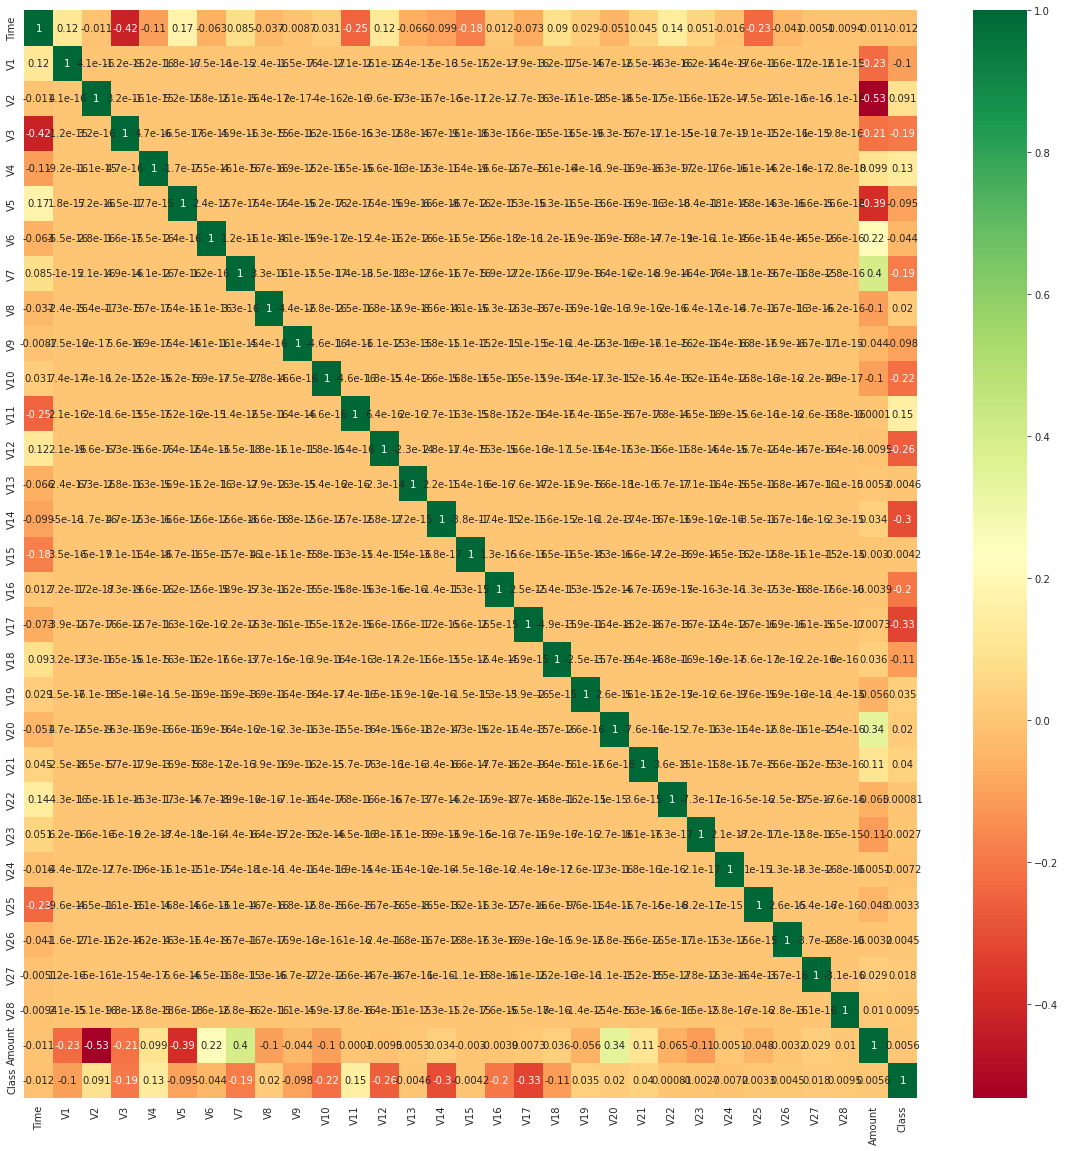

In [29]:
#Getting Correlation of each features in the dataset
corrmat = data_1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#Plotting Heatmap
g = sns.heatmap(ccdf[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [37]:
non_fraud_sample = non_fraud.sample(n=492)

In [38]:
new_cc_df = pd.concat([non_fraud_sample,fraud], axis = 0)

In [39]:
new_cc_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
266753,162474.0,1.822843,-1.465915,-0.247699,-0.334644,-1.379553,0.051310,-1.117090,0.053283,0.260170,...,-0.276325,-0.537384,0.302558,0.653174,-0.727092,0.417581,-0.020213,-0.001781,155.98,0
232318,147125.0,1.569621,-1.960154,-1.075419,-0.619822,-1.082442,-0.142587,-0.496433,-0.102341,0.165334,...,-0.047126,-0.829651,0.145113,0.446326,-0.546037,-0.623092,-0.058330,0.016094,330.60,0
21989,31975.0,1.302071,-0.574262,0.282749,-0.688597,-1.025950,-0.959104,-0.433920,-0.150505,-1.139943,...,0.295554,0.663060,-0.128564,0.578798,0.553754,-0.149929,-0.017555,0.008028,45.80,0
269734,163746.0,-0.134683,0.518785,0.964579,0.355104,0.437104,-0.591002,1.022191,-0.272317,0.229757,...,0.145125,0.575054,0.004129,-0.081314,-0.730483,-0.820768,0.072393,0.014246,46.25,0
227688,145176.0,2.057105,0.002082,-1.914683,0.189433,0.642622,-0.216289,-0.020712,0.033510,0.441167,...,-0.352740,-0.993914,0.286868,-0.094475,-0.276408,0.193797,-0.071530,-0.048667,1.79,0


In [40]:
#Last 5 rows of the dataset
new_cc_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [42]:
#Dataset Information
new_cc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 266753 to 281674
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    984 non-null    float64
 1   V1      984 non-null    float64
 2   V2      984 non-null    float64
 3   V3      984 non-null    float64
 4   V4      984 non-null    float64
 5   V5      984 non-null    float64
 6   V6      984 non-null    float64
 7   V7      984 non-null    float64
 8   V8      984 non-null    float64
 9   V9      984 non-null    float64
 10  V10     984 non-null    float64
 11  V11     984 non-null    float64
 12  V12     984 non-null    float64
 13  V13     984 non-null    float64
 14  V14     984 non-null    float64
 15  V15     984 non-null    float64
 16  V16     984 non-null    float64
 17  V17     984 non-null    float64
 18  V18     984 non-null    float64
 19  V19     984 non-null    float64
 20  V20     984 non-null    float64
 21  V21     984 non-null    float64

In [43]:
#Dataset Description
new_cc_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,86134.294715,-2.373258,1.839816,-3.512539,2.246904,-1.556852,-0.686412,-2.786467,0.293039,-1.257707,...,0.342407,0.002075,-0.023281,-0.052520,0.024329,0.016735,0.088306,0.045604,100.894400,0.500000
std,48616.687276,5.513538,3.641045,6.212789,3.192420,4.203723,1.768704,5.838260,4.852163,2.339493,...,2.783482,1.162262,1.143412,0.559965,0.677551,0.480192,1.027962,0.442096,212.648424,0.500254
min,49.000000,-30.552380,-8.402154,-31.103685,-3.804846,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.305101,-7.263482,-2.326437,0.000000,0.000000
25%,42832.000000,-2.922415,-0.148112,-5.084967,-0.024341,-1.742162,-1.573185,-3.060742,-0.217270,-2.324444,...,-0.175590,-0.541855,-0.231544,-0.400211,-0.320688,-0.304036,-0.054461,-0.057444,1.290000,0.000000
50%,78807.000000,-0.763417,0.971011,-1.304444,1.201469,-0.427898,-0.665271,-0.659012,0.147397,-0.641284,...,0.145051,0.003908,-0.046712,0.012252,0.065658,-0.024399,0.055689,0.039526,18.990000,0.500000
75%,133762.250000,1.081567,2.833075,0.270419,4.244461,0.502506,0.097086,0.262267,0.869629,0.172128,...,0.641307,0.566916,0.191270,0.363254,0.405959,0.322700,0.466568,0.226227,99.990000,1.000000
max,172424.000000,2.387185,22.057729,3.005544,12.114672,11.095089,6.474115,5.802537,20.007208,6.022718,...,27.202839,8.361985,5.466230,1.147453,2.208209,2.745261,3.052358,3.214474,2125.870000,1.000000


In [45]:
#Distribution of fraudulent & non-fraudulent transactions in the new dataset
new_cc_df['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [47]:
#Comparison of feature data for both transactions classes from the new dataset
new_cc_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,91521.782520,0.025433,0.055854,0.008204,-0.048221,0.037522,0.024913,-0.004203,0.015441,0.065709,...,0.020138,-0.028774,-0.009898,-0.006253,0.000091,0.007209,-0.018178,0.006038,0.015541,79.577480
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [49]:
X = new_cc_df.drop(columns = 'Class', axis = 1)
Y = new_cc_df['Class']

In [50]:
#Features
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
266753  162474.0  1.822843 -1.465915 -0.247699 -0.334644 -1.379553  0.051310   
232318  147125.0  1.569621 -1.960154 -1.075419 -0.619822 -1.082442 -0.142587   
21989    31975.0  1.302071 -0.574262  0.282749 -0.688597 -1.025950 -0.959104   
269734  163746.0 -0.134683  0.518785  0.964579  0.355104  0.437104 -0.591002   
227688  145176.0  2.057105  0.002082 -1.914683  0.189433  0.642622 -0.216289   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [51]:
#Target
print(Y)

266753    0
232318    0
21989     0
269734    0
227688    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify = Y, random_state = 2)
print(X.shape, X_train.shape, X_test.shape)

Model 1 : Logistic Regression

In [57]:
log_reg = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000)

#Training Logistic Regression model with the training data
log_reg.fit(X_train, Y_train)

LogisticRegression(class_weight='balanced', max_iter=10000)

In [59]:
#Accuracy on training data
X_train_prediction = log_reg.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [60]:
print('Training data accuracy : ',round(train_data_accuracy*100,2))

Training data accuracy :  96.79


In [61]:
#Accuracy on testing data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [62]:
print('Test data accuracy : ',round(test_data_accuracy*100,2))

Test data accuracy :  99.91
